In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns

df = pd.read_excel('R:\\Bunmi\\SHG_LIF_Files\\MaxProjFiberAnalysis.xlsx', sheet_name='Sheet2')
df.head()

,Exp,trt,Fiber,time,Length,Width,Area,%Diff_Length,%Diff_Width,%Diff_Area
0,07-22,Ctrl,1,2m,85.997070,-23.941986,-95316.468750,3.265434,-9.673755,-22.831955
1,07-22,Ctrl,1,20m,73.528076,-34.377228,-109764.187500,2.791968,-13.890112,-26.292738
2,07-22,Ctrl,1,40m,-61.045654,7.683716,-27147.968750,-2.317992,3.104604,-6.502981
3,07-22,Trt,1,2m,21.504883,5.508057,4740.453125,0.958192,2.458279,1.856685
4,07-22,Trt,2,2m,13.074951,-12.031494,-12636.750000,0.435630,-4.705670,-2.952605


In [47]:
df[(df['Exp'] == '10-02')]['trt'].unique()

array(['Trt', 'Ctrl'], dtype=object)

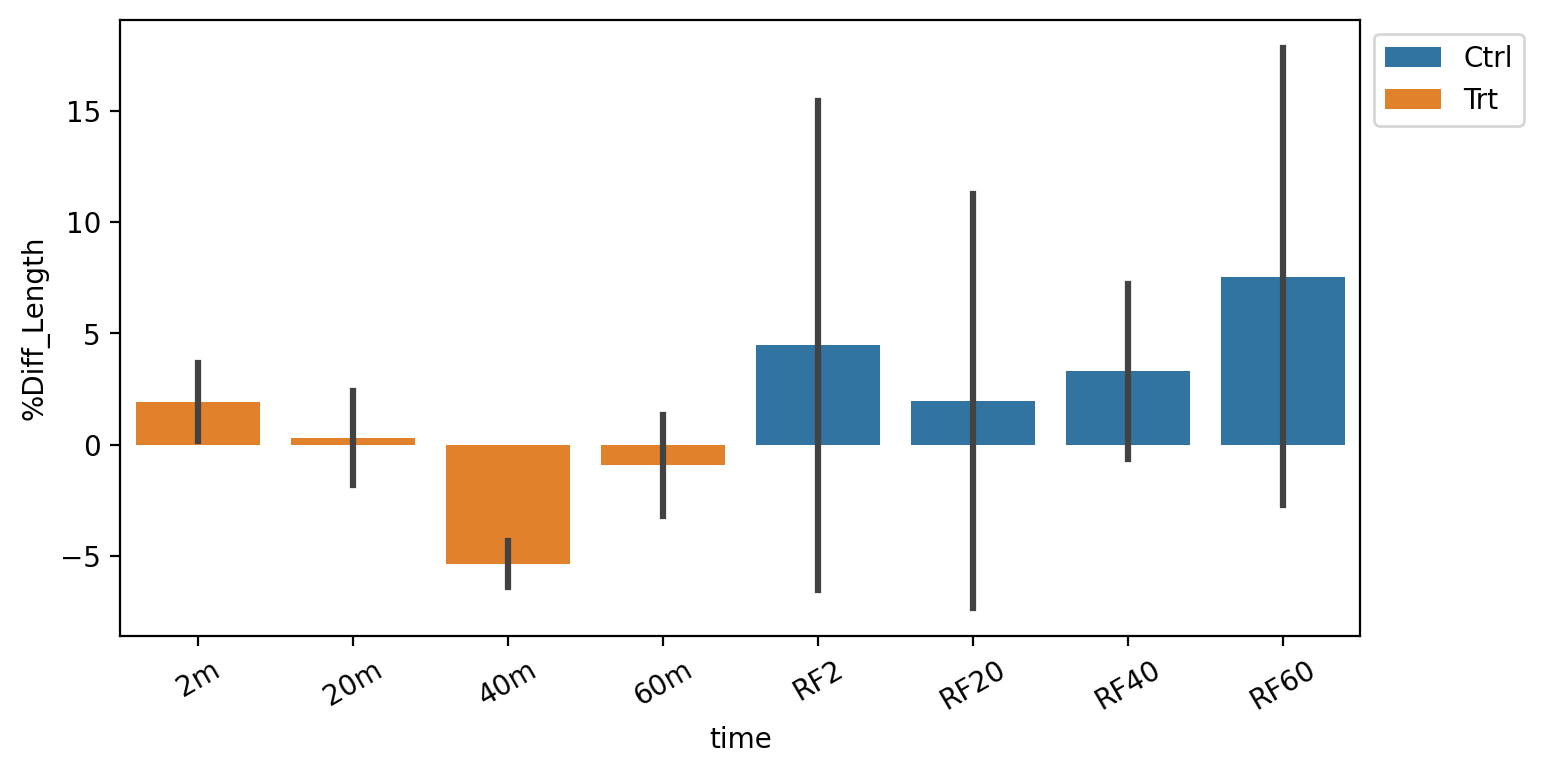

In [54]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.barplot(
    data = df[(df['Exp'] == '10-02') ],
    x = 'time',
    y = '%Diff_Length',
    hue = 'trt',
    hue_order = ['Ctrl', 'Trt'],#'CtrlRF', 
   # order = ['2m', '20m', '40m', '60m'],#'0m', 
    errorbar='sd'
)
#plt.xticks(rotation = 30)
'''sns.barplot(
    data = df[(df['Exp'] == '07-22') & (df['Sample'].str.contains('RF')) ],
    x = 'trt',
    hue = 'Sample',
    y = 'Length',
)'''
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1, 1))

<Axes: xlabel='time', ylabel='Area'>

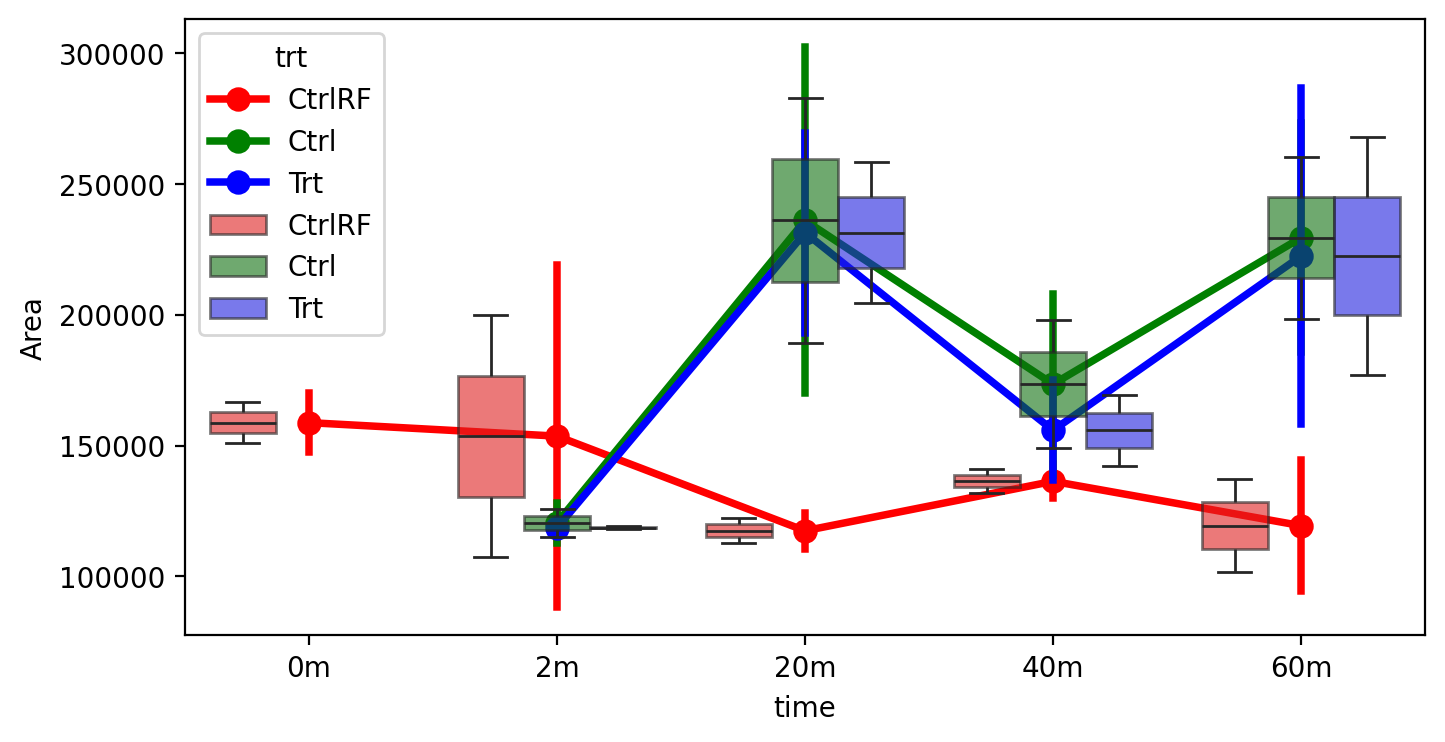

In [39]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.pointplot(
    data = df[(df['Exp'] == '10-02') ],
    x = 'time',
    y = 'Area',
    hue = 'trt',
    hue_order = ['CtrlRF', 'Ctrl', 'Trt'],
    order = ['0m', '2m', '20m', '40m', '60m'],
    errorbar='sd',
    #alpha = .6,
    palette = ['red', 'green', 'blue']
)
sns.boxplot(
    data = df[(df['Exp'] == '10-02') ],
    x = 'time',
    y = 'Area',
    hue = 'trt',
    hue_order = ['CtrlRF', 'Ctrl', 'Trt'],
    order = ['0m', '2m', '20m', '40m', '60m'],
  # alpha = .6,
   #dodge = .02,
   boxprops=dict(alpha=.6),#,linewidth=1, facecolor='w', edgecolor='k', 
palette = ['red', 'green', 'blue']
)


C:\Users\oadeji01\AppData\Local\Temp\ipykernel_12728\408523662.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_12728\408523662.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_12728\408523662.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_12728\408523662.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_12728\408523662.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_12728\408523662.py:15: UserWarning: The palette lis

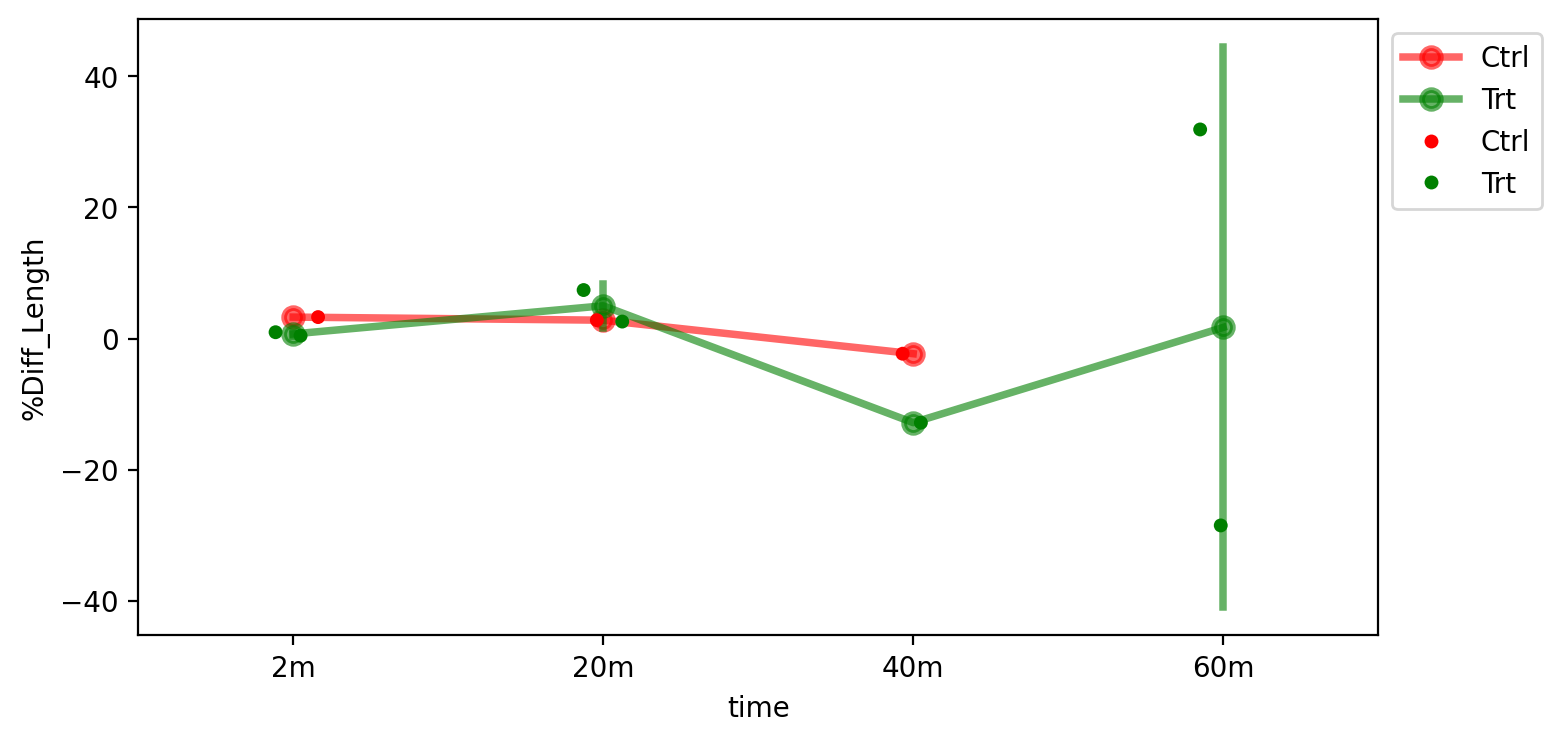

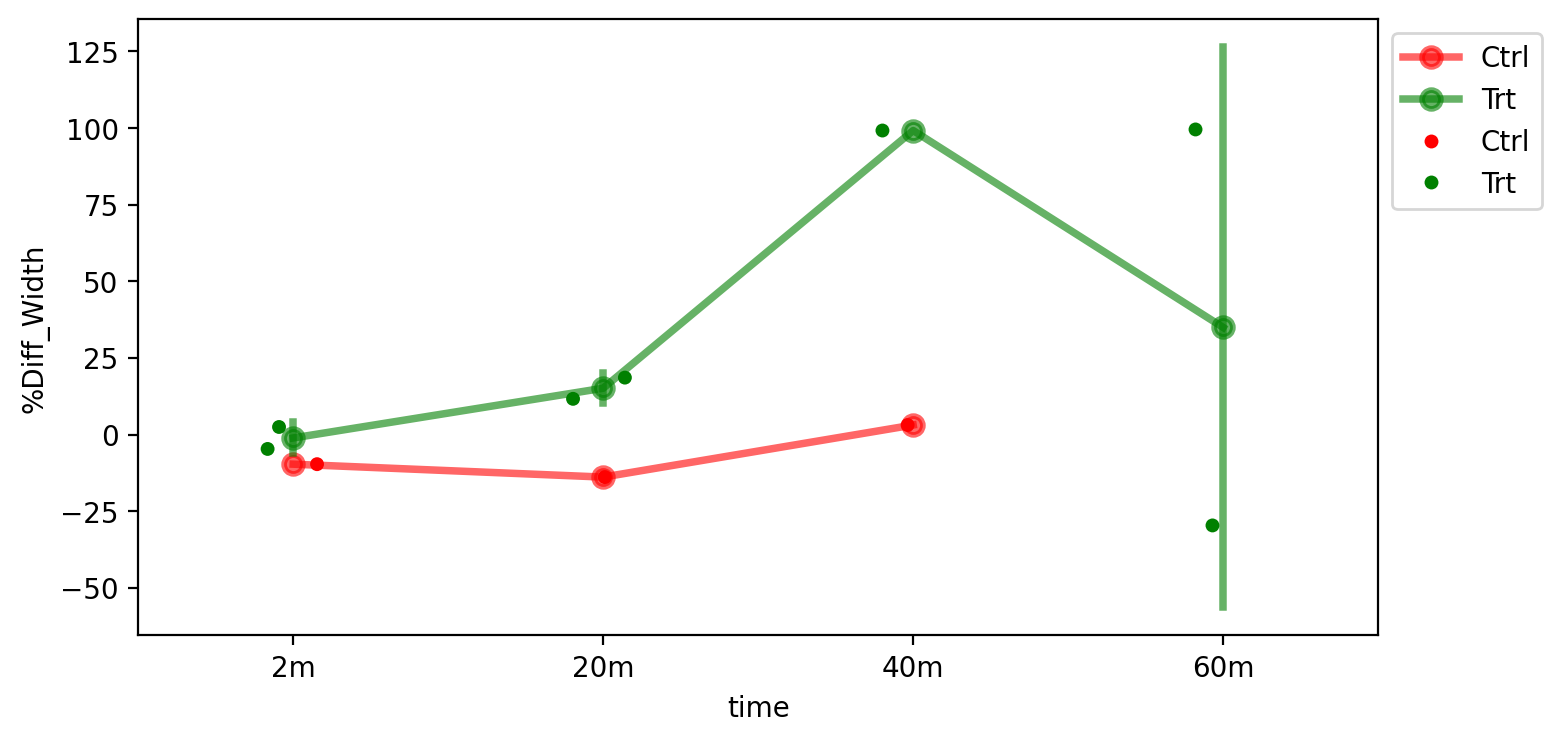

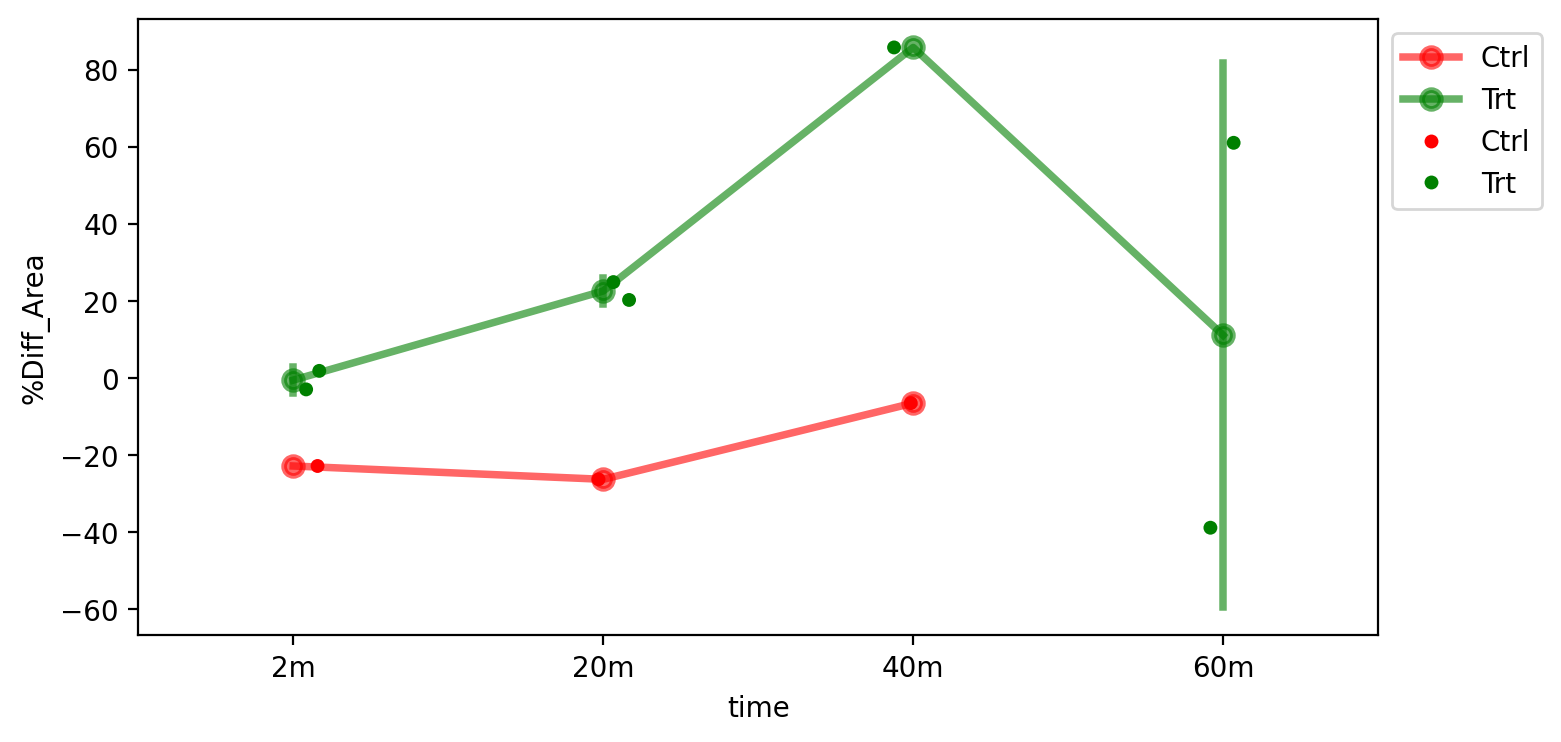

In [94]:
for col in ['%Diff_Length', '%Diff_Width', '%Diff_Area']:
    plt.figure(figsize = (8, 4), dpi = 200);
    sns.pointplot(
        data = df[(df['Exp'] == '07-22')],
        x = 'time',
        y = col,
        hue = 'trt',
        hue_order = ['Ctrl', 'Trt'],#'CtrlRF', 
    # order = ['0m', '2m', '20m', '40m', '60m'],
        errorbar='sd',
        alpha = .6,
        palette = ['red', 'green', 'blue'],
    estimator = 'mean',
    );
    sns.stripplot(
        data = df[(df['Exp'] == '07-22')],
        x = 'time',
        y = col,
        hue = 'trt',
        hue_order = ['Ctrl', 'Trt'],
        #order = ['0m', '2m', '20m', '40m', '60m'],
    # alpha = .6,
    #dodge = .02,
    #boxprops=dict(alpha=.6),#,lineWidth=1, facecolor='w', edgecolor='k', 
    palette = ['red', 'green', 'blue']
    );
    plt.legend(bbox_to_anchor = (1, 1));